In [1]:
import pandas as pd
import os 
from os import listdir
import glob
import matplotlib.pyplot as plt
import seaborn as sns

#### <font color='green'>Merge the files</font>

In [2]:
# Read multiple files 

df=pd.read_csv(r"C:\Users\ang\Desktop\GIT_projects\Data\data_csv\Sales_08.2019.csv")
files= [file for file in os.listdir(r"C:\Users\ang\Desktop\GIT_projects\Data\data_csv")]
for f in files:
 print(f)

Sales_01.2019.csv
Sales_02.2019.csv
Sales_03.2019.csv
Sales_04.2019.csv
Sales_05.2019.csv
Sales_06.2019.csv
Sales_07.2019.csv
Sales_08.2019.csv
Sales_09.2019.csv
Sales_10.2019.csv
Sales_11.2019.csv
Sales_12.2019.csv


In [3]:
# merge all files to one data frame (df)

allfiles = glob.glob(r'C:\Users\ang\Desktop\GIT_projects\Data\data_csv\*.csv')
df = pd.concat((pd.read_csv(f) for f in allfiles))


In [4]:
df.shape

(186850, 6)

In [5]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

#### <font color='green'>Clean up the data</font>

In [6]:
# show the first 10 reords of data
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


In [7]:
#checking NaN values
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
22945,NaN,NaN,NaN,NaN,NaN,NaN
22962,NaN,NaN,NaN,NaN,NaN,NaN
23309,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#delete all NaN values
df=df.dropna(how='all')


In [9]:
#filter all data by the values not equal to "Or" and save to data frame
df=df[df["Order Date"].str[0:2] != 'Or' ]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [10]:
#add Month column
df["Month"]=df["Order Date"].str[0:2]
df["Month"]= df["Month"].astype('int')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


#### <font color='orange'>Find the best month for sales and how much was earned that month</font>

In [11]:
#convert columns to the corect data types
df["Quantity Ordered"]=pd.to_numeric(df["Quantity Ordered"]) #convert to int
df["Price Each"]=pd.to_numeric(df["Price Each"]) #convert to float
df["Sales"] = df["Quantity Ordered"]*df["Price Each"] #create Sales column to calculate sales
df["Sales"].astype(float) #convert to float values in Sales column
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [12]:
# sum values per month and sort it descending
result=df.groupby("Month").sum("Sales")
result_sort=df.groupby("Month").sum("Sales").sort_values(by= ["Sales"],axis=0, ascending=False)
result_sort

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


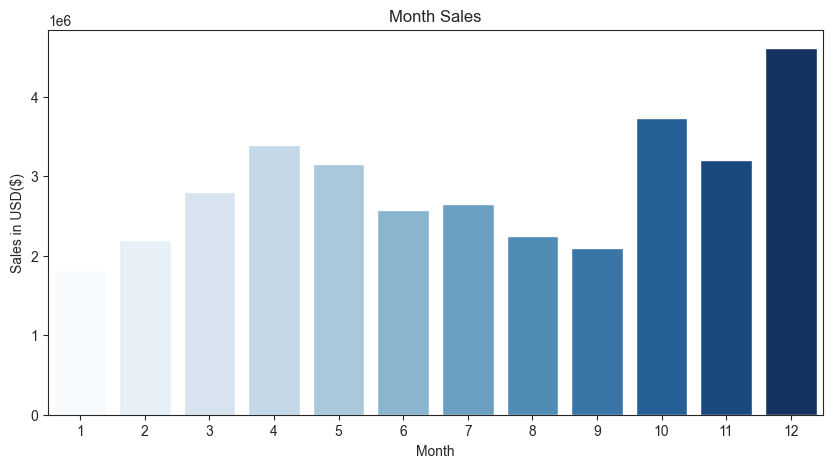

In [13]:
#a chart showing the dependencies between the Sales and Month column

sns.set_style('ticks')
plt.figure(figsize=(10, 5))
sns.barplot(x=result.index,
            y=result["Sales"].values,
            hue=result.index,  #`x` as `hue`
            palette="Blues",
            dodge=False)  #dodge=False to keep bars aligned

plt.title('Month Sales')
plt.ylabel("Sales in USD($)")
plt.xlabel("Month")
plt.legend([],[], frameon=False)  #hide legend
plt.show()


In [14]:
#the highest sales was in december and earned 4613443.34$ 

#### <font color='orange'>What city had the highest number of sales? </font>

In [15]:
# use lambda function to get city name from column Purchase Address
def get_state(address):
    return address.split(",")[2].split(" ")[1]
df["City"]=df["Purchase Address"].apply(lambda x: x.split(",")[1]+" ("+get_state(x)+")")
#another solution:
#def get_city(address):
#   return address.split(",")[1]
#df["City"]=df["Purchase Address"].apply(lambda x: get_city(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


In [16]:
# calculating sales each city 
city=df.groupby("City").sum("Sales")
city_sort=df.groupby("City").sum("Sales").sort_values(by= ["Sales"],axis=0, ascending=False)
city_sort

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8211461.74,315520,8262203.91
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Boston (MA),22528,3637409.77,141112,3661642.01
Atlanta (GA),16602,2779908.20,104794,2795498.58
Dallas (TX),16730,2752627.82,104620,2767975.40
Seattle (WA),16553,2733296.01,104941,2747755.48
Portland (OR),11303,1860558.22,70621,1870732.34
Austin (TX),11153,1809873.61,69829,1819581.75


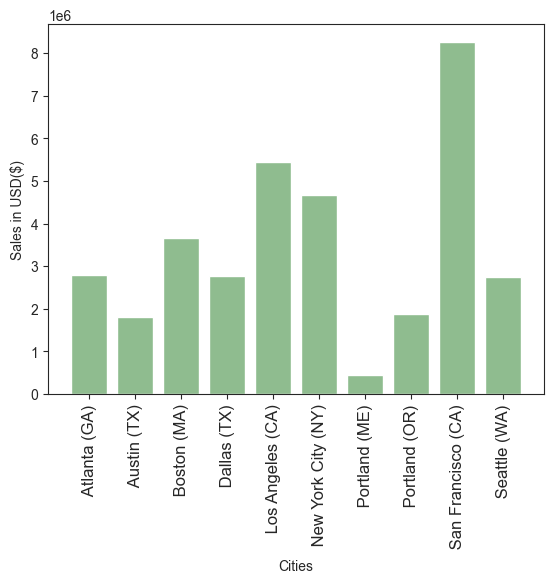

In [17]:
#a chart showing the dependencies between the sales and city column
kk=[city for city, x in df.groupby("City")]
plt.bar(kk,(city["Sales"]), color="darkseagreen")

plt.xticks(kk,rotation='vertical',size=12)
plt.ylabel("Sales in USD($)")
plt.xlabel("Cities")
plt.show()



In [18]:
#the highest number of sales had San Francisco 8262203.91

#### <font color='orange'>Where is the best time for advertisement to increase of purchases?</font>

In [19]:
#changing type of data in column Order Date
df["Order Date"] = pd.to_datetime(df["Order Date"], format= 'mixed', yearfirst=True)
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,2001-05-19 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


In [20]:
# adding new columns Hour and Minute and separating it from Order Date
df["Hour"] = df["Order Date"].dt.hour
df["Minute"] = df["Order Date"].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2001-05-19 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11,59


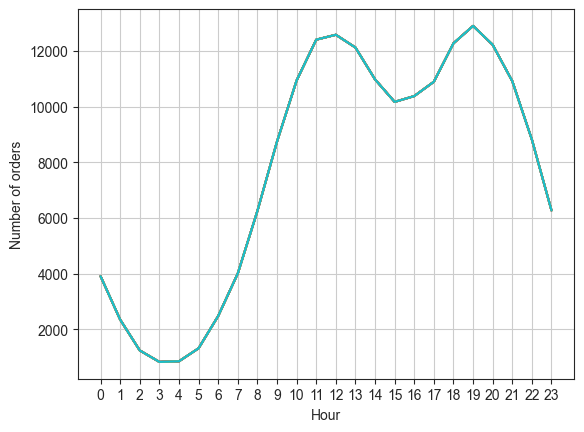

In [21]:
#a chart showing the dependencies between the number of orders and hour column
hours=[hour for hour, df in df.groupby("Hour")]
plt.plot(hours,df.groupby(["Hour"]).count())
plt.xticks(hours)
plt.ylabel("Number of orders")
plt.xlabel("Hour")
plt.grid()
plt.show()

In [22]:
# the best time for advertisement to increase of purchases is about 11am or 7pm.

#### <font color='orange'>Which product are often sold together?</font>

In [23]:
#checking which order is duplicated and grouping them together in Group_Product column
df2 = df[df['Order ID'].duplicated(keep=False)].copy() 
df2['Group_Product'] = df2.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Group_Product
41,141275,USB-C Charging Cable,1,11.95,2001-07-19 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin (TX),16,6,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2001-07-19 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin (TX),16,6,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2001-02-19 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles (CA),8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2001-02-19 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles (CA),8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2001-10-19 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City (NY),11,19,"Vareebadd Phone,Wired Headphones"


In [24]:
#delete duplicate values
df2=df2[["Order ID","Group_Product"]].drop_duplicates()
df2

,Order ID,Group_Product
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
24977,319536,"Macbook Pro Laptop,Wired Headphones"
24998,319556,"Google Phone,Wired Headphones"
25027,319584,"iPhone,Wired Headphones"
25040,319596,"iPhone,Lightning Charging Cable"


In [25]:
#import additional library to counting unique pairs of numbers  
from itertools import combinations
from collections import Counter

In [26]:
count=Counter()
for row in df2["Group_Product"]:
    row_list=row.split(",")
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(15):
 print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58


In [27]:
# iPhone and Lightning Charging Cable are often sold together

#### <font color='orange'>What product have the best sold? </font>

In [28]:
#calculate column Quantity Ordered, Price Each, Sales by each Product
product=df.groupby("Product")
order=product[["Quantity Ordered","Price Each","Sales"]].sum()
order_sort=product[["Quantity Ordered","Price Each","Sales"]].sum().sort_values(by= ["Quantity Ordered"],axis=0, ascending=False)
order_sort

,Quantity Ordered,Price Each,Sales
Product,,,
AAA Batteries (4-pack),31017,61716.59,92740.83
AA Batteries (4-pack),27635,79015.68,106118.40
USB-C Charging Cable,23975,261740.85,286501.25
Lightning Charging Cable,23217,323787.10,347094.15
Wired Headphones,20557,226395.18,246478.43
Apple Airpods Headphones,15661,2332350.00,2349150.00
Bose SoundSport Headphones,13457,1332366.75,1345565.43
27in FHD Monitor,7550,1125974.93,1132424.50
iPhone,6849,4789400.00,4794300.00


In [29]:
#the best sold have 'AAA Batteries (4-pack)' (quanaty)

In [30]:
#calculate income per product
income = df.groupby('Product').agg({'Quantity Ordered' : 'sum', 'Price Each' : 'mean', 'Sales' : 'sum'})
income.sort_values(by=["Sales"], ascending=False)

,Quantity Ordered,Price Each,Sales
Product,,,
Macbook Pro Laptop,4728,1700.00,8037600.00
iPhone,6849,700.00,4794300.00
ThinkPad Laptop,4130,999.99,4129958.70
Google Phone,5532,600.00,3319200.00
27in 4K Gaming Monitor,6244,389.99,2435097.56
34in Ultrawide Monitor,6199,379.99,2355558.01
Apple Airpods Headphones,15661,150.00,2349150.00
Flatscreen TV,4819,300.00,1445700.00
Bose SoundSport Headphones,13457,99.99,1345565.43


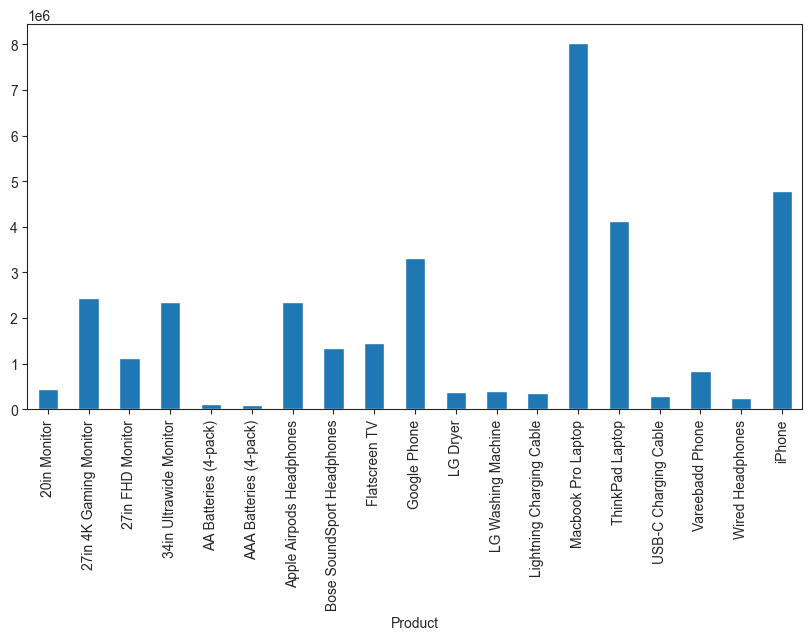

In [31]:
ax = income['Sales'].plot.bar(figsize = (10,5))

In [32]:
#in terms of revenues is 'Macbook Pro Laptop'

#### <font color='orange'>The sales by location </font>

In [33]:
import folium #the Folium library to create interactive maps
from folium import plugins
from folium.plugins import HeatMap
import geocoder #geocoder to convert city names into latitude and longitude
import geopy #geopy to create location-based applications

In [34]:
sales_by_city = df.groupby(['City']).agg({'Quantity Ordered' : 'sum',  'Sales' : 'sum'}).reset_index()
sales_by_city

,City,Quantity Ordered,Sales
0,Atlanta (GA),16602,2795498.58
1,Austin (TX),11153,1819581.75
2,Boston (MA),22528,3661642.01
3,Dallas (TX),16730,2767975.40
4,Los Angeles (CA),33289,5452570.80
5,New York City (NY),27932,4664317.43
6,Portland (ME),2750,449758.27
7,Portland (OR),11303,1870732.34
8,San Francisco (CA),50239,8262203.91
9,Seattle (WA),16553,2747755.48


In [35]:
# Create an initial map centered at latitude 37 and longitude -90, with a zoom level of 3.5
map = folium.Map(location=[37,-90], zoom_start=3.5)

# Initialize an empty list to store the lat, lng, and sales data
location =[]

# Get a unique list of cities from the DataFrame column 'City'
city = df.City.unique().tolist()

# Loop through each city in the city list
for x in city:
    geo = geocoder.arcgis(x)  # Use ArcGIS geocoding service to get latitude and longitude for the city
    val = sales_by_city.loc[sales_by_city['City'] ==x]['Sales'].item() # Get the sales value for the city
    location.append([geo.lat, geo.lng,val ])  # Add the city's latitude, longitude, and sales to the 'location' list
    folium.Marker([geo.lat,geo.lng],  # Add a marker on the map for each city with a tooltip showing the city name and sales in millions    
                  opacity=0, # Set marker opacity to 0 (making it invisible) to highlight the heatmap effect
                  tooltip = ('<body>City: {} <br> Sales: {}M</body>'.format(x, round(val/1000000,2)))).add_to(map)  # Tooltip displays city and sales in millions

# Add a HeatMap to the map using the 'location' data (lat, lng, sales intensity)
HeatMap(location).add_to(map)
# Add a layer control to toggle the heatmap on/off (useful if other layers are added)
folium.LayerControl().add_to(map)
#Display the map
map

In [36]:
# the best sales is in location San Francisco (CA)